In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [3]:
df = pd.read_csv('clean_data.csv')

print("Исходные типы данных:")
print(df.dtypes)

df['crime'] = df['crime'].astype(int)
df['felony'] = df['felony'].astype(int)
df['high_education'] = df['high_education'].astype(int)
df['population'] = df['population'].astype(int)
df['revenue'] = df['revenue'].astype(int)

df['unemployment'] = df['unemployment'].str.replace(',', '.').astype(float)
df['birthrate'] = df['birthrate'].str.replace(',', '.').astype(float)

print("\nНовые типы данных:")
print(df.dtypes)

print(df.head())
print(df.describe())

Исходные типы данных:
Region             object
crime             float64
felony            float64
high_education    float64
population        float64
revenue           float64
unemployment       object
birthrate          object
dtype: object

Новые типы данных:
Region             object
crime               int64
felony              int64
high_education      int64
population          int64
revenue             int64
unemployment      float64
birthrate         float64
dtype: object
                  Region  crime  felony  high_education  population  revenue  \
0         Алтайский край  39177   10626            5648     2268179    21779   
1       Амурская область  16253    4316            3099      772525    28136   
2  Архангельская область  17472    5077            3776     1114322    32817   
3   Астраханская область  13062    3448            3274      989430    23205   
4   Белгородская область  14588    4343            5951     1531917    29751   

   unemployment  birthrate  
0   

In [5]:
y = np.array(df['felony']) #количество тяжких и особо тяжких преступлений

print('Подушевой доход')
x = np.array(df['revenue']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Количество преступлений') 
x = np.array(df['crime']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Наличие высшего образования') 
x = np.array(df['high_education']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Население') 
x = np.array(df['population']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Уровень безработицы') 
x = np.array(df['unemployment']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Коэффициент рождаемости') 
x = np.array(df['birthrate']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

Подушевой доход
R^2: 0.04384794079000143
b_0: 2886.3511890572768
b: [0.1145658]
Количество преступлений
R^2: 0.9697551411735965
b_0: -530.6761070551729
b: [0.2954656]
Наличие высшего образования
R^2: 0.003910262658997521
b_0: 6046.852890657731
b: [0.00761922]
Население
R^2: 0.942919306455621
b_0: 197.53779482048412
b: [0.00347053]
Уровень безработицы
R^2: 0.12893569336059496
b_0: 12680.32957526
b: [-460.64407651]
Коэффициент рождаемости
R^2: 0.054134878884902315
b_0: 14084.752886324302
b: [-5190.65812193]


In [7]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


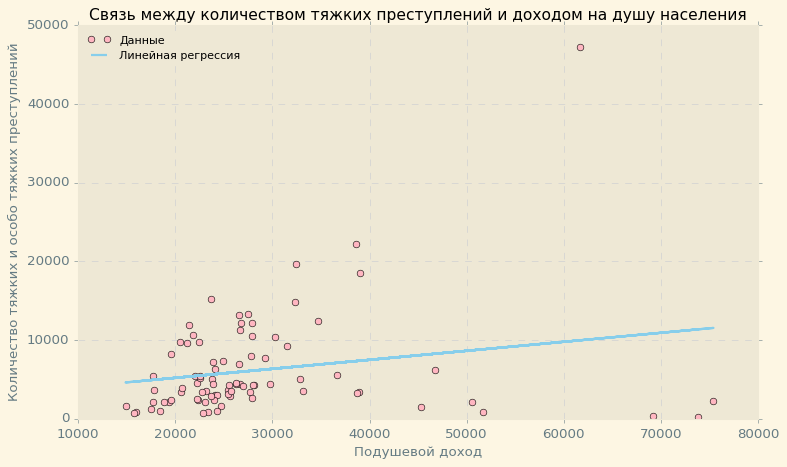

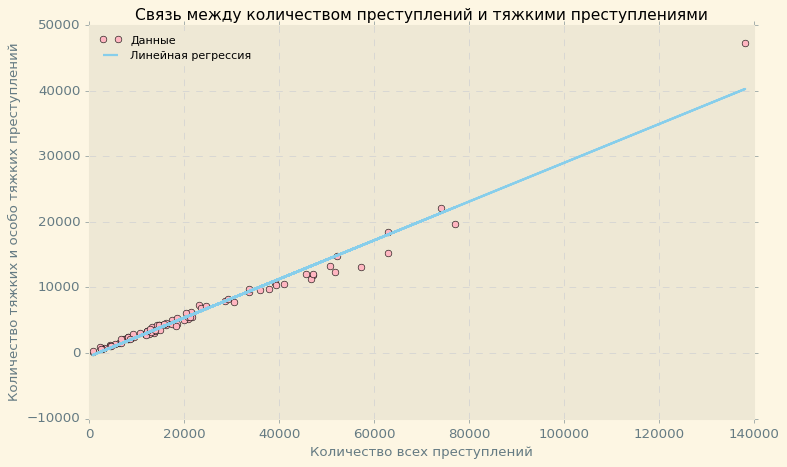

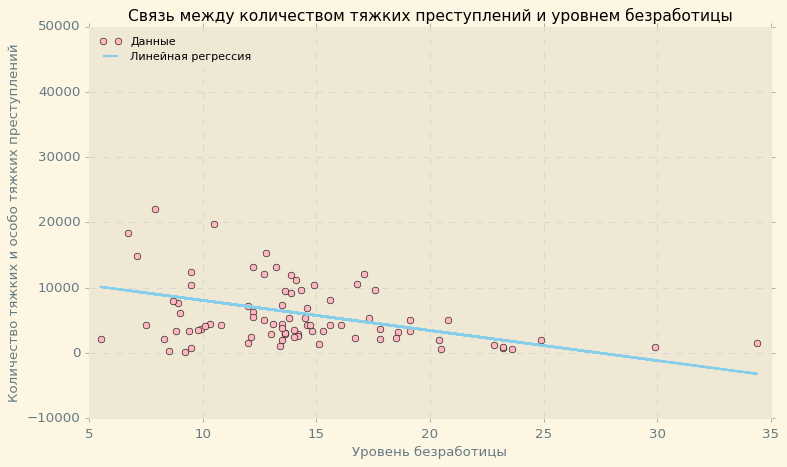

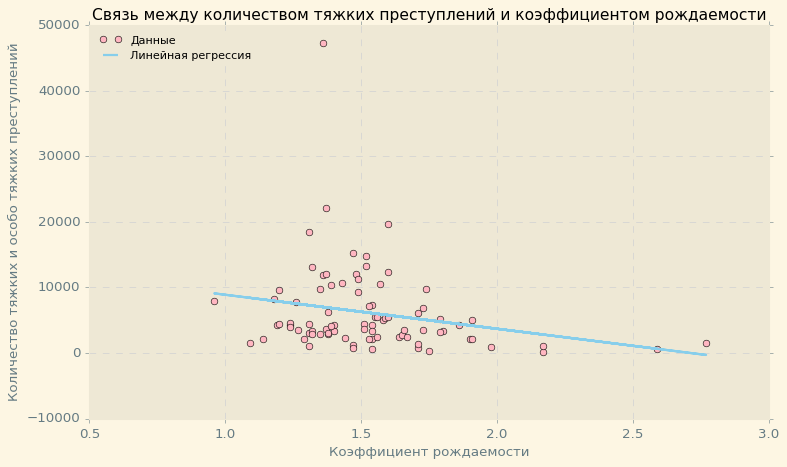

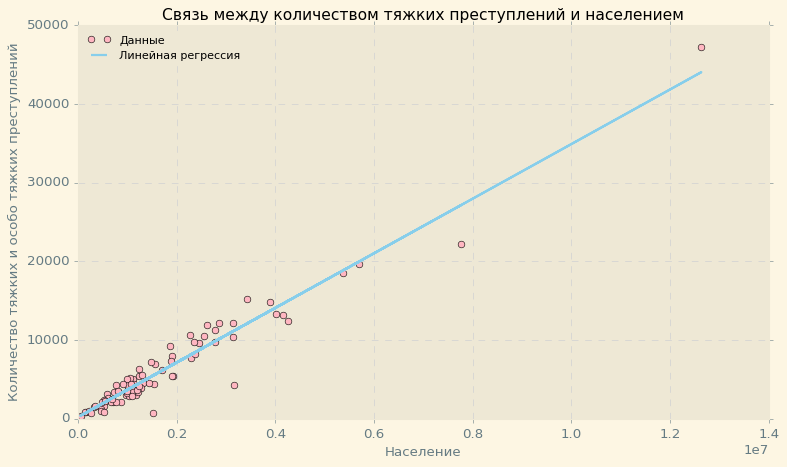

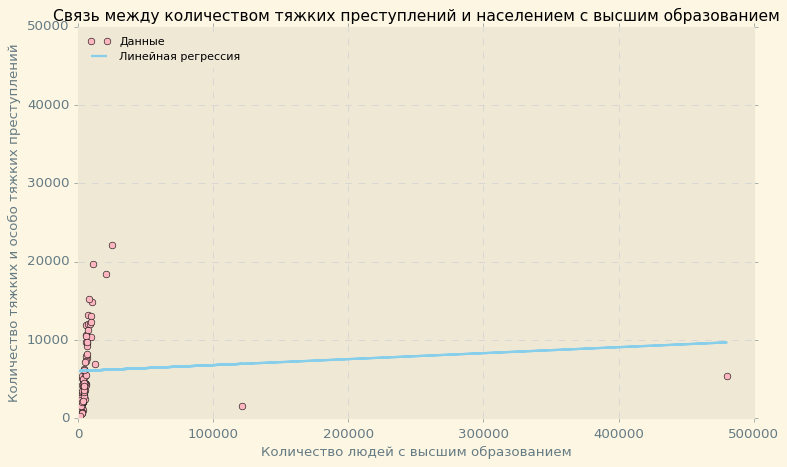

In [25]:
x = np.array(df['revenue']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Подушевой доход', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и доходом на душу населения', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


x = np.array(df['crime']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Количество всех преступлений', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством преступлений и тяжкими преступлениями', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


x = np.array(df['unemployment']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Уровень безработицы', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и уровнем безработицы', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

x = np.array(df['birthrate']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Коэффициент рождаемости', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и коэффициентом рождаемости', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

x = np.array(df['population']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Население', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и населением', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

x = np.array(df['high_education']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Количество людей с высшим образованием', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и населением с высшим образованием', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()
